In [1]:
import pandas as pd
from pathlib import Path

In [4]:
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
df_crypto['IsTrading'].unique()

array([ True, False])

In [8]:
trading_df = df_crypto[df_crypto.IsTrading == True]
trading_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
trading_df['IsTrading'].unique()

array([ True])

In [14]:
reduced_df = trading_df.drop('IsTrading', axis=1)
reduced_df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

In [15]:
clean_df = reduced_df.dropna()
clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [16]:
clean_df.isna().any()

Unnamed: 0         False
CoinName           False
Algorithm          False
ProofType          False
TotalCoinsMined    False
TotalCoinSupply    False
dtype: bool

In [20]:
mined_coin_df = clean_df[clean_df.TotalCoinsMined > 0]
mined_coin_df['TotalCoinsMined'].min()

41.99995383

In [83]:
new_df = mined_coin_df.drop('CoinName', axis=1)
new_df2 = new_df.drop('Unnamed: 0', axis=1)
new_df2.columns

Index(['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply'], dtype='object')

In [84]:
print(new_df2['Algorithm'].unique())
print(new_df2['ProofType'].unique())

['Scrypt' 'X13' 'SHA-256' 'Ethash' 'X11' 'CryptoNight-V7' 'Equihash'
 'SHA-512' 'Multiple' 'X15' 'Quark' 'Groestl' 'PoS' 'NeoScrypt' 'SHA3'
 'HybridScryptHash256' 'PHI1612' 'Lyra2REv2' 'CryptoNight' 'Shabal256'
 'Counterparty' 'Stanford Folding' 'QuBit' 'M7 POW' 'Lyra2RE' 'QUAIT'
 'Blake2b' 'BLAKE256' '1GB AES Pattern Search' 'NIST5' 'Dagger' 'X11GOST'
 'POS 3.0' 'SHA-256D' 'Lyra2Z' 'X14' 'DPoS' 'Dagger-Hashimoto' 'Blake2S'
 '536' 'Argon2d' 'Cloverhash' 'Skein' 'Time Travel' 'Keccak'
 'SkunkHash v2 Raptor' 'VeChainThor Authority' 'Ouroboros' 'POS 2.0' 'C11'
 'SkunkHash' 'Proof-of-BibleHash' 'SHA-256 + Hive' 'Proof-of-Authority'
 'XEVAN' 'VBFT' 'IMesh' 'Green Protocol' 'Semux BFT consensus' 'X16R'
 'Tribus' 'CryptoNight Heavy' 'Jump Consistent Hash' 'HMQ1725'
 'Cryptonight-GPU' 'ECC 256K1' 'Blake' 'Exosis' 'Equihash+Scrypt'
 'Leased POS' 'TRC10']
['PoW/PoS' 'PoW' 'PoS' 'PoC' 'PoS/PoW/PoT' 'PoST' 'PoW/nPoS' 'PoS/PoW'
 'dPoW/PoW' 'PoW/PoW' 'DPoS' 'TPoS' 'PoW/PoS ' 'Proof of Authority'
 'P

In [92]:
X_dummies = pd.get_dummies(new_df2, columns = ['Algorithm', 'ProofType'])
print(X_dummies.columns)
X_dummies

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_dummies)

In [94]:
print(scaled_data)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [95]:
from sklearn.decomposition import PCA


In [96]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get 90% principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [97]:
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-3.030888e-14,-1.119407e-13,1.693327e-11,-0.007129,-1.319756,-0.051813,...,-5.093640e-16,-1.089821e-15,3.609068e-15,4.168638e-15,-1.116902e-17,-2.153758e-15,4.603334e-15,-3.727546e-15,1.611650e-15,-2.722612e-15
1,-0.318434,1.032331,-0.591126,0.001386,-3.038057e-14,-1.121350e-13,1.679444e-11,-0.007739,-1.322514,-0.056674,...,-5.137025e-16,-9.996086e-16,3.386046e-15,3.944841e-15,1.321882e-17,-1.920282e-15,4.878571e-15,-3.858557e-15,1.639490e-15,-2.893643e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.144356e-14,-1.716924e-13,5.747701e-11,-0.054781,-1.542879,-0.943951,...,4.219710e-14,5.673996e-14,-4.036146e-14,-5.681678e-14,1.696452e-14,-4.210529e-14,-5.687981e-14,1.334438e-13,-4.707389e-14,8.879210e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.910306e-15,4.167586e-14,-1.492511e-11,-0.002071,0.281463,0.251862,...,-5.710778e-15,3.720381e-15,-4.513260e-15,-1.137534e-14,4.633205e-15,-3.496582e-15,-4.281593e-15,2.303438e-14,-6.409954e-15,1.863125e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.923548e-14,8.246556e-14,-2.069681e-11,0.027735,0.519099,0.188820,...,-1.048403e-13,-2.286185e-15,4.421477e-14,-6.998842e-14,-3.606377e-14,-1.820200e-14,1.376735e-13,-4.196608e-15,1.147976e-13,1.144212e-13


In [98]:
from sklearn.manifold import TSNE

In [99]:
tsne = TSNE(learning_rate=35)

In [100]:
tsne_features = tsne.fit_transform(df_crypto_pca)

/Users/alexanderlorin/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [101]:
tsne_features

array([[ -6.6528063,  16.480736 ],
       [-12.122055 ,  11.506109 ],
       [ -9.3964   ,  26.035198 ],
       ...,
       [ 17.747719 , -14.383422 ],
       [  2.6594203, -19.910732 ],
       [  7.374998 ,   6.987805 ]], dtype=float32)

In [102]:
tsne_df=pd.DataFrame(tsne_features, columns = ['x', 'y'],index = df_crypto_pca.index)

In [103]:
# Prepare to plot the dataset

# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

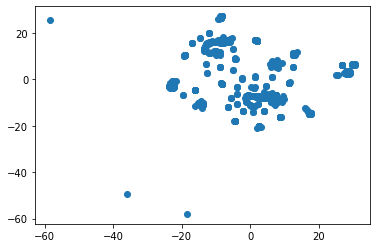

In [108]:
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

In [109]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

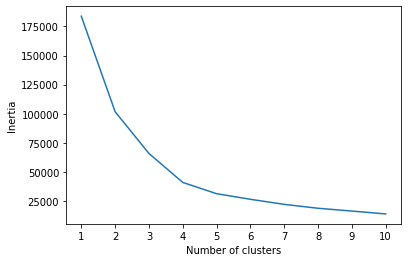

In [110]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

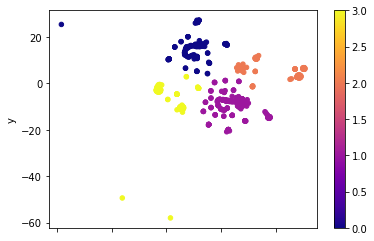

In [113]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(tsne_df)
predictions = model.predict(tsne_df)
tsne_df.plot(kind='scatter',x='x',y='y',colormap='plasma',c=predictions)
plt.show()

In [ ]:
#Although the first plot looks like the Cryptocurrencies are clustered into 1 cluster, when we run the data through the model, we can observe that the cryptocurrencies can be clustered into 4 clusters.